In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9028d7a4143ba4309ca193ca03def48c


In [3]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [4]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

613

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | faanui
Processing Record 2 of Set 1 | dalen
Processing Record 3 of Set 1 | bagan
Processing Record 4 of Set 1 | koumac
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | husavik
Processing Record 7 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | saint-philippe
Processing Record 11 of Set 1 | leningradskiy
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | les cayes
Processing Record 14 of Set 1 | cherskiy
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | kharp
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 19 of Set 1 | taft
Processing Record 20 of Set 1 | katsuura
Processing Record 21 of Set 1 | dikson
Processing Record 22 of Set 1 | 

Processing Record 40 of Set 4 | pangnirtung
Processing Record 41 of Set 4 | kalmunai
Processing Record 42 of Set 4 | mizdah
Processing Record 43 of Set 4 | vao
Processing Record 44 of Set 4 | linkoping
Processing Record 45 of Set 4 | sioux lookout
Processing Record 46 of Set 4 | ponta do sol
Processing Record 47 of Set 4 | chokurdakh
Processing Record 48 of Set 4 | saint george
Processing Record 49 of Set 4 | calvinia
Processing Record 50 of Set 4 | pacific grove
Processing Record 1 of Set 5 | atambua
Processing Record 2 of Set 5 | anadyr
Processing Record 3 of Set 5 | puerto escondido
Processing Record 4 of Set 5 | bredy
Processing Record 5 of Set 5 | kabanjahe
Processing Record 6 of Set 5 | rawannawi
City not found. Skipping...
Processing Record 7 of Set 5 | kayes
Processing Record 8 of Set 5 | kruisfontein
Processing Record 9 of Set 5 | moctezuma
Processing Record 10 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 11 of Set 5 | ixtapa
Processing Record 12 o

Processing Record 30 of Set 8 | shar
Processing Record 31 of Set 8 | champerico
Processing Record 32 of Set 8 | ludvika
Processing Record 33 of Set 8 | perm
Processing Record 34 of Set 8 | grand gaube
Processing Record 35 of Set 8 | krasnoselkup
Processing Record 36 of Set 8 | trojan
Processing Record 37 of Set 8 | tiznit
Processing Record 38 of Set 8 | kathu
Processing Record 39 of Set 8 | caravelas
Processing Record 40 of Set 8 | muzaffarabad
Processing Record 41 of Set 8 | angoche
Processing Record 42 of Set 8 | krasnoarmeysk
Processing Record 43 of Set 8 | imbituba
Processing Record 44 of Set 8 | bang sai
Processing Record 45 of Set 8 | caborca
Processing Record 46 of Set 8 | darlowo
Processing Record 47 of Set 8 | codrington
Processing Record 48 of Set 8 | gimli
Processing Record 49 of Set 8 | suntar
Processing Record 50 of Set 8 | elko
Processing Record 1 of Set 9 | marawi
Processing Record 2 of Set 9 | lompoc
Processing Record 3 of Set 9 | kupang
Processing Record 4 of Set 9 | m

Processing Record 18 of Set 12 | amga
Processing Record 19 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 20 of Set 12 | half moon bay
Processing Record 21 of Set 12 | mariel
Processing Record 22 of Set 12 | altay
Processing Record 23 of Set 12 | ekhabi
Processing Record 24 of Set 12 | sayville
Processing Record 25 of Set 12 | luau
Processing Record 26 of Set 12 | araouane
Processing Record 27 of Set 12 | alice springs
Processing Record 28 of Set 12 | shambu
Processing Record 29 of Set 12 | lircay
Processing Record 30 of Set 12 | bubaque
Processing Record 31 of Set 12 | beringovskiy
Processing Record 32 of Set 12 | kismayo
Processing Record 33 of Set 12 | honningsvag
Processing Record 34 of Set 12 | abonnema
Processing Record 35 of Set 12 | mrirt
City not found. Skipping...
Processing Record 36 of Set 12 | chernyshevskiy
Processing Record 37 of Set 12 | springbok
Processing Record 38 of Set 12 | maningrida
Processing Record 39 of Set 12 | santa cruz
Processing Record

In [7]:
len(city_data)

562

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Faanui,-16.48,-151.75,77.63,80,21,20.71,PF,2020-07-11 03:02:46
1,Dalen,52.70,6.76,51.01,96,1,6.17,NL,2020-07-11 03:06:28
2,Bagan,54.10,77.66,68.52,63,0,9.04,RU,2020-07-11 03:06:29
3,Koumac,-20.57,164.28,72.63,60,3,9.53,NC,2020-07-11 03:06:29
4,New Norfolk,-42.78,147.06,50.00,75,100,8.01,AU,2020-07-11 03:06:29
5,Husavik,66.04,-17.34,42.80,93,90,2.24,IS,2020-07-11 03:06:29
6,Barrow,71.29,-156.79,37.40,86,90,8.05,US,2020-07-11 03:06:29
7,Punta Arenas,-53.15,-70.92,30.20,92,98,9.17,CL,2020-07-11 03:06:30
8,Saint-Philippe,-21.36,55.77,64.40,77,48,2.24,RE,2020-07-11 03:06:30
9,Leningradskiy,69.38,178.42,47.05,70,13,15.01,RU,2020-07-11 03:06:30


In [9]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Faanui,PF,2020-07-11 03:02:46,-16.48,-151.75,77.63,80,21,20.71
1,Dalen,NL,2020-07-11 03:06:28,52.70,6.76,51.01,96,1,6.17
2,Bagan,RU,2020-07-11 03:06:29,54.10,77.66,68.52,63,0,9.04
3,Koumac,NC,2020-07-11 03:06:29,-20.57,164.28,72.63,60,3,9.53
4,New Norfolk,AU,2020-07-11 03:06:29,-42.78,147.06,50.00,75,100,8.01
5,Husavik,IS,2020-07-11 03:06:29,66.04,-17.34,42.80,93,90,2.24
6,Barrow,US,2020-07-11 03:06:29,71.29,-156.79,37.40,86,90,8.05
7,Punta Arenas,CL,2020-07-11 03:06:30,-53.15,-70.92,30.20,92,98,9.17
8,Saint-Philippe,RE,2020-07-11 03:06:30,-21.36,55.77,64.40,77,48,2.24
9,Leningradskiy,RU,2020-07-11 03:06:30,69.38,178.42,47.05,70,13,15.01


In [10]:
# Create the output file (CSV).
output_data_file = "Weather Data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1594498969.9185941

In [13]:
# Converting time format
today = time.strftime("%x")
today

'07/11/20'

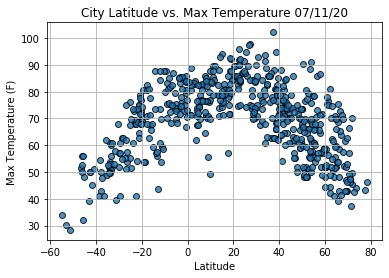

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather Data/Fig1.png")

# Show plot.
plt.show()

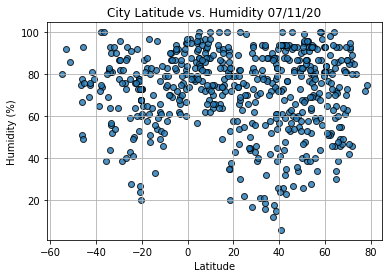

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Weather Data/Fig2.png")
# Show plot.
plt.show()

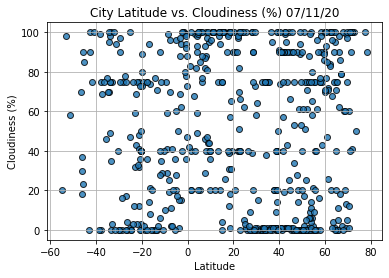

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Weather Data/Fig3.png")
# Show plot.
plt.show()

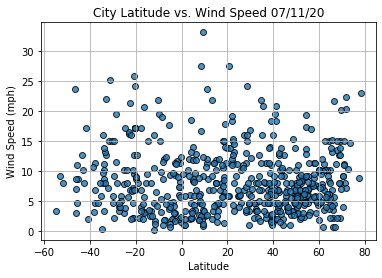

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Weather Data/Fig4.png")
# Show plot.
plt.show()